In [1]:
# Install Requirements
!pip install -r requirements.txt

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
#import data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
Id = test.iloc[:, 0]

In [47]:
trainc = train.columns[train.isnull().any()] # Null columns in train data
testc = test.columns[test.isnull().any()]    # Null columns in test data 
totc = train.columns                         # Total columns

In [48]:
# Keeping features which don't have missing values in test data
keep_feats = [x for x in totc if x not in testc]

In [49]:
train_data = train.loc[:, keep_feats]

In [50]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer  

ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (C:\Users\saipa\anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [51]:
train_data.columns[train_data.isnull().any()]

Index(['Electrical'], dtype='object')

In [52]:
keep_feats.remove('Electrical')

In [53]:
len(keep_feats)

47

In [54]:
train_data = train.loc[:, keep_feats]
test_data = test.loc[:, keep_feats[:-1]]

In [55]:
enc = []
for types in train_data.dtypes.iteritems():
    if not str(types[1]) == 'int64': 
        enc.append(types[0])

In [56]:
train_data.loc[:, enc] = train_data.loc[:, enc].apply(LabelEncoder().fit_transform)
test_data.loc[:, enc] = test_data.loc[:, enc].apply(LabelEncoder().fit_transform)

In [57]:
from sklearn.model_selection import train_test_split
X = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [58]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1, max_depth=15)

rf.fit(X_train, y_train)

print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9763629094476578
0.8924348176888043


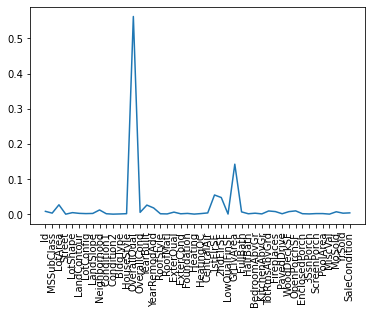

In [59]:
plt.plot(rf.feature_importances_)
plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=90);

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

print(gb.score(X_train, y_train))
print(gb.score(X_test, y_test))

0.951745569137506
0.8948330963736891


In [64]:
gb.fit(train_data.iloc[:, :-1], train_data.iloc[:, -1])
print(test_data)
predictions = pd.DataFrame(gb.predict(test_data), Id.values)
predictions.to_csv('n4.csv', header=['SalePrice'])

        Id  MSSubClass  LotArea  Street  LotShape  LandContour  LotConfig  \
0     1461          20    11622       1         3            3          4   
1     1462          20    14267       1         0            3          0   
2     1463          60    13830       1         0            3          4   
3     1464          60     9978       1         0            3          4   
4     1465         120     5005       1         0            1          4   
...    ...         ...      ...     ...       ...          ...        ...   
1454  2915         160     1936       1         3            3          4   
1455  2916         160     1894       1         3            3          4   
1456  2917          20    20000       1         3            3          4   
1457  2918          85    10441       1         3            3          4   
1458  2919          60     9627       1         3            3          4   

      LandSlope  Neighborhood  Condition1  ...  WoodDeckSF  OpenPorchSF  \


In [62]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);

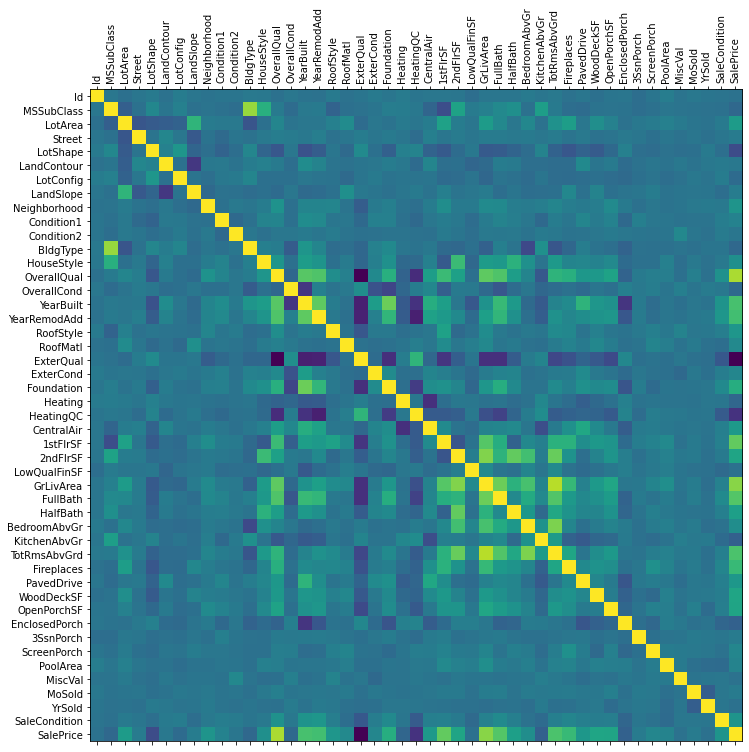

In [63]:
plot_corr(train_data, 12)